#**Prediction of client's subscription to a term deposit**
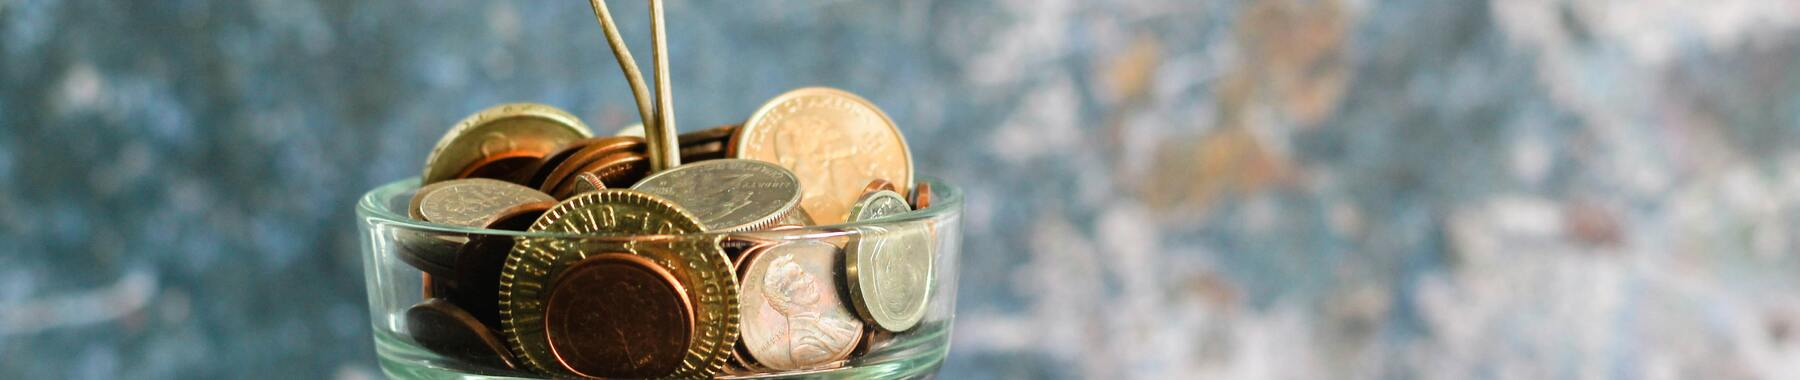
*  Predicting if the client will subscribe to a term deposit.


  



**About Dataset :**

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

**Goal:**

 The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features:**


* age (numeric)
* job: type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self- employed","services","student","technician","unemployed","unknown")
* marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* education: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default: has credit in default? (categorical: "no","yes","unknown")
* housing: has housing loan? (categorical: "no","yes","unknown")
* loan: has personal loan? (categorical: "no","yes","unknown")

Related with the last contact of the current campaign:
* contact: contact communication type (categorical: "cellular","telephone")
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* duration: last contact duration, in seconds (numeric).
    Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no").
    Yet, the duration is not known before a call is performed.
    Also, after the end of the call y is obviously known.
    Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

    Other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric,
    includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


Output variable (desired target):
* y: has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [ ]:
df.shape

(32950, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
#check for class imbalance

In [ ]:
#target class count
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

Text(0.5, 0, 'target variable')

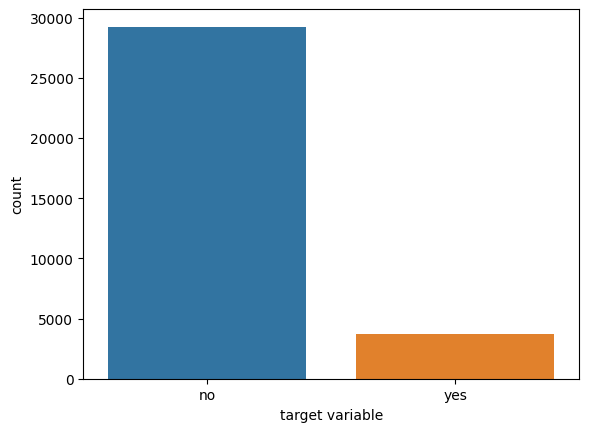

In [ ]:
sns.countplot(x=df['y'])
plt.xlabel('target variable')

percentage of NO and YES


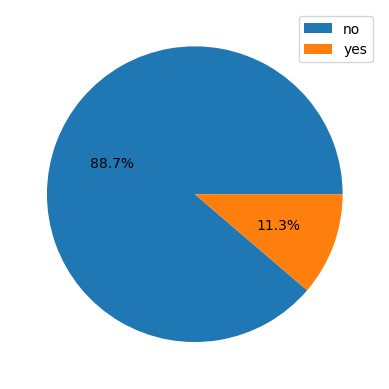

In [ ]:
# percentage of class present in target variable(y)
print("percentage of NO and YES")
plt.pie(df['y'].value_counts(),autopct='%1.1f%%')
plt.legend(df['y'].value_counts().index)

The class distribution in the target variable is ~89:11 indicating an imbalance dataset

#**Exploratory Data Analysis**

**univariate analysis of categorical variables**

In [ ]:
# indentifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


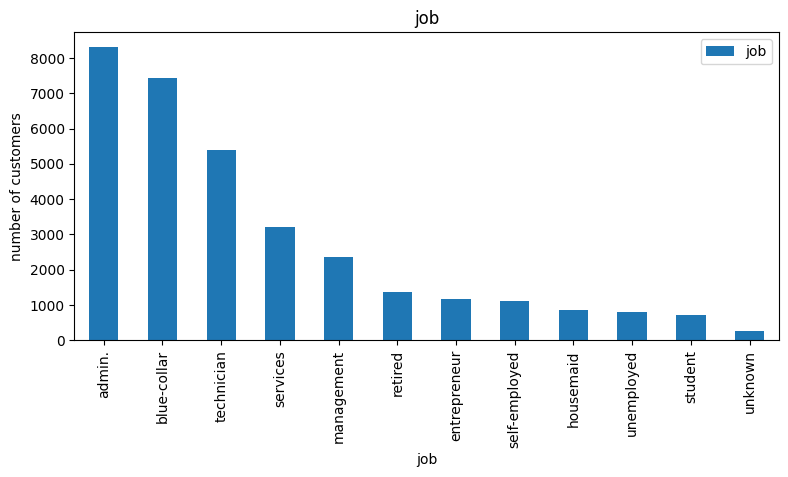

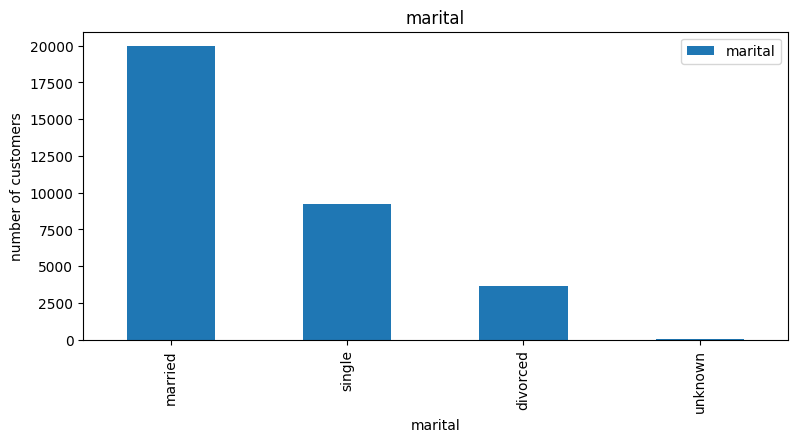

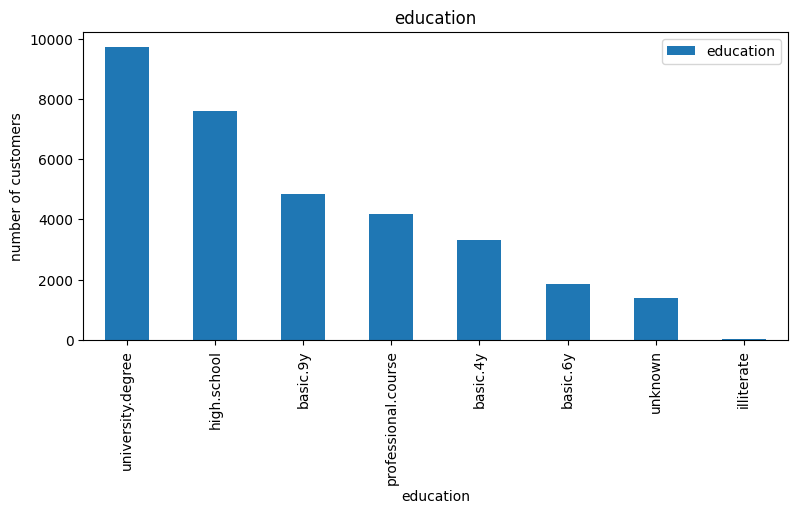

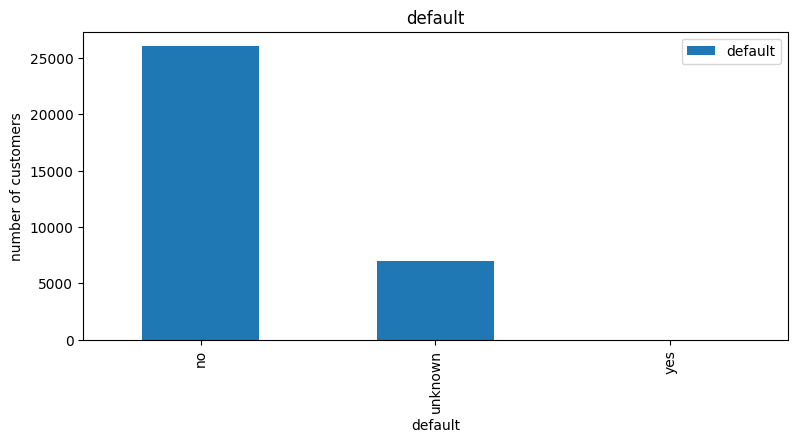

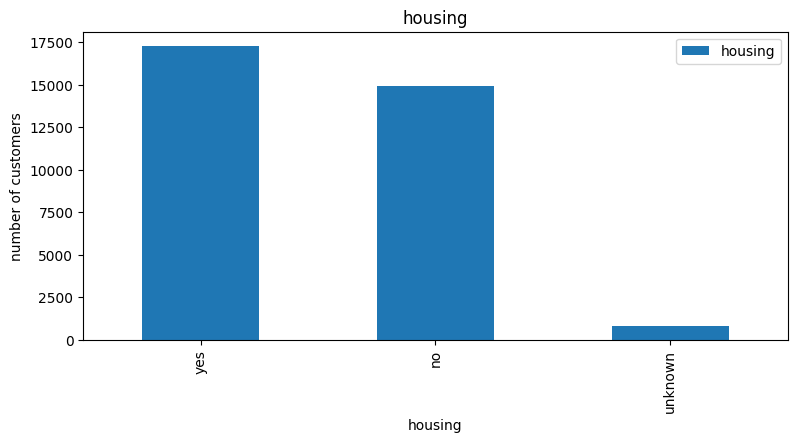

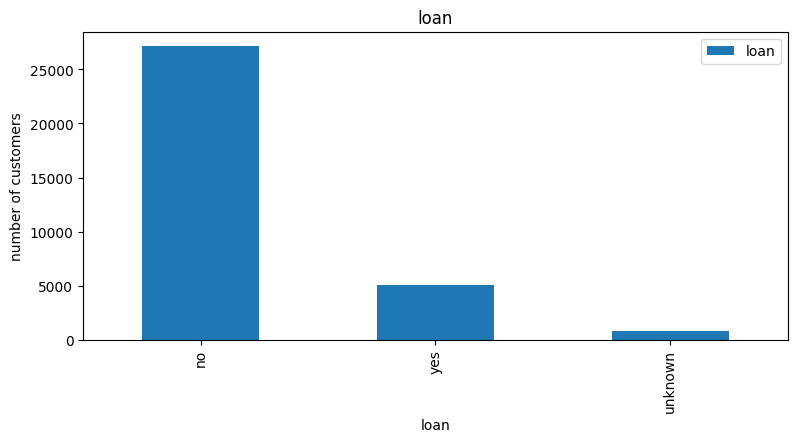

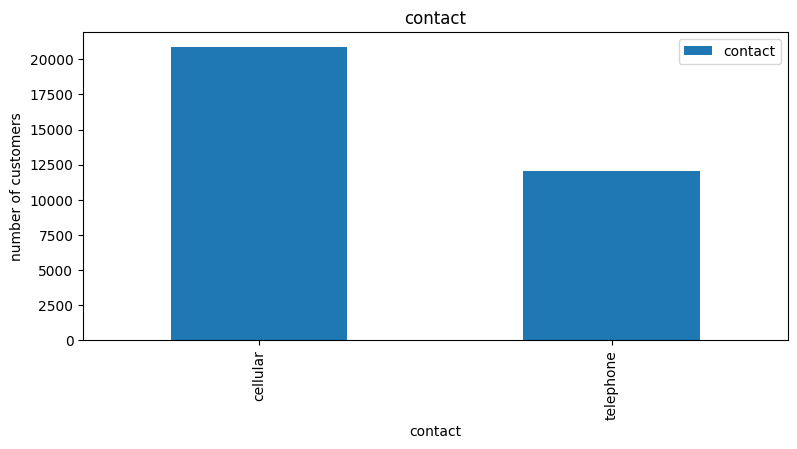

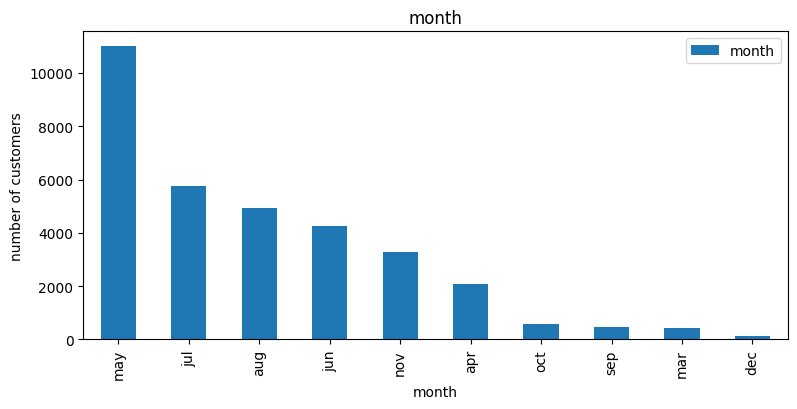

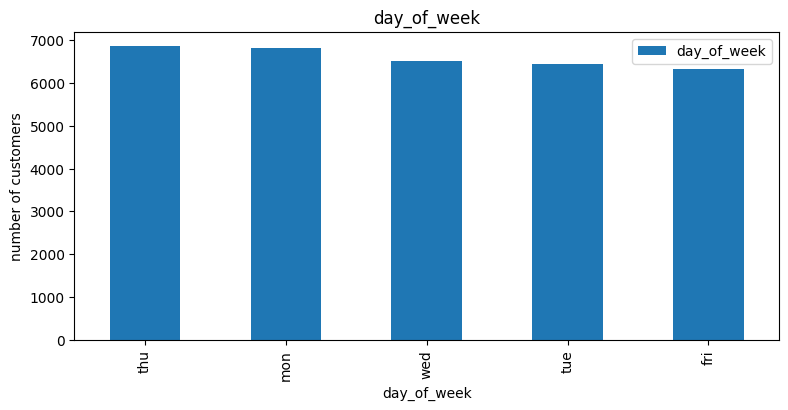

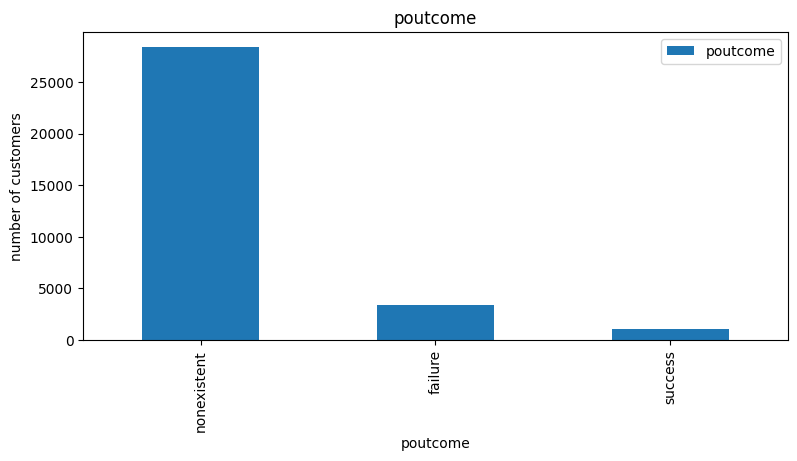

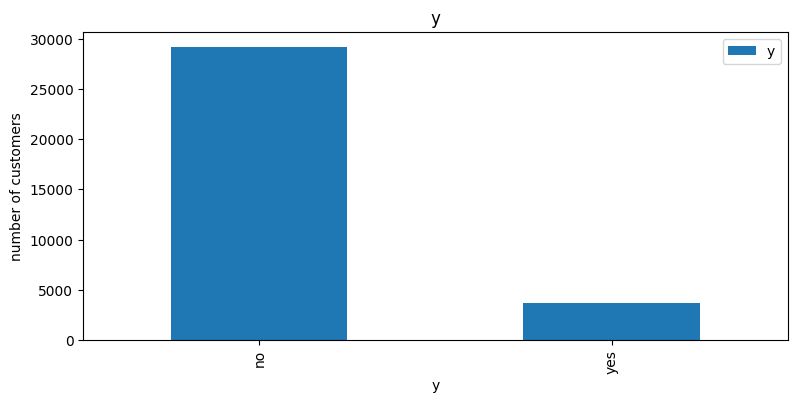

In [ ]:
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.legend()
    plt.title(column)


Observations :

*The top three professions that our
 customers belong to are - administration, blue-collar jobs and technicians.

*A huge number of the customers are
 married.
    
*Majority of the customers do not
 have a credit in default
    
*Many of our past customers have
 applied for a housing loan but very few have applied for personal loans.
   
*Cell-phones seem to be the most
 favoured method of reaching out to customers.
    
*Many customers have been contacted
 in the month of May.
    
*The plot for the target variable
 shows heavy imbalance in the target variable.



In [ ]:
#unique
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('----------------------------------------------------------------')

age
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
----------------------------------------------------------------
job
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
----------------------------------------------------------------
marital
['married' 'divorced' 'single' 'unknown']
----------------------------------------------------------------
education
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
----------------------------------------------------------------
default
['unknown' 'no' 'yes']
----------------------------------------------------------------
housing
['no' 'yes' 'unknown']
--------------------------------------------------

The missing values in some columns have been represented as unknown.

In [ ]:
#replacing 'unknown' with mode
lst=['job','marital','education','default','housing','loan']
for i in lst:
  mode=df[i].mode()[0]
  df[i]=df[i].replace('unknown',mode)

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('----------------------------------------------------------------')

age
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
----------------------------------------------------------------
job
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
----------------------------------------------------------------
marital
['married' 'divorced' 'single']
----------------------------------------------------------------
education
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
----------------------------------------------------------------
default
['no' 'yes']
----------------------------------------------------------------
housing
['no' 'yes']
----------------------------------------------------------------
loan
['no' 'yes']
------------------

**Univariate analysis of Numerical columns**

In [ ]:
# indentifying the numerical variables
num_var= df.select_dtypes(include=np.number)
num_var.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


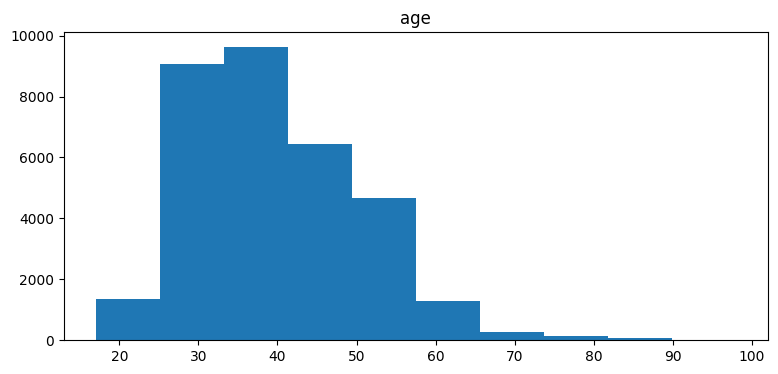

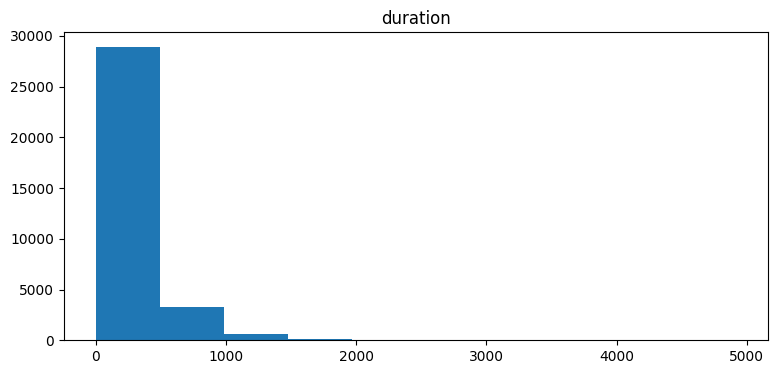

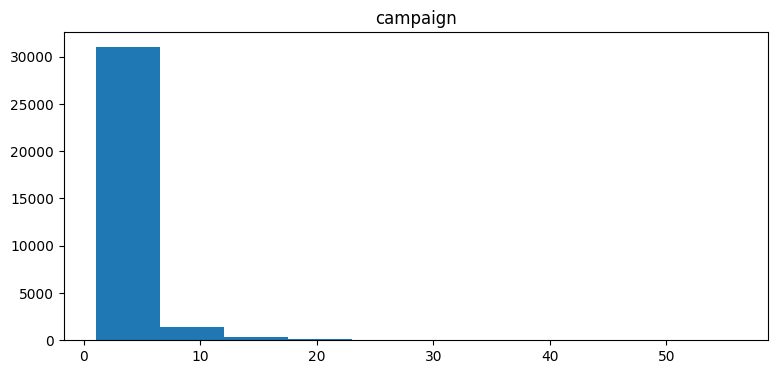

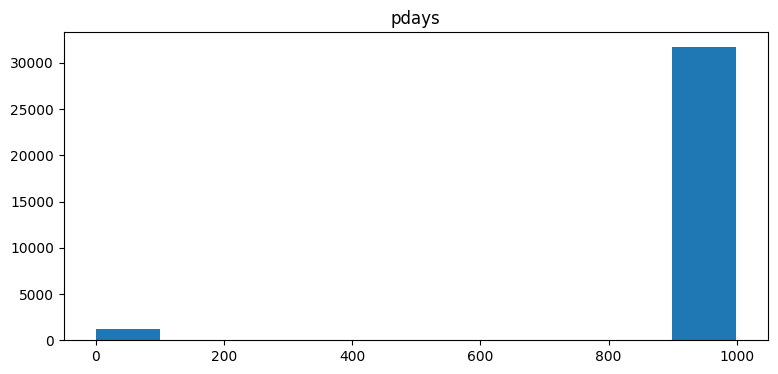

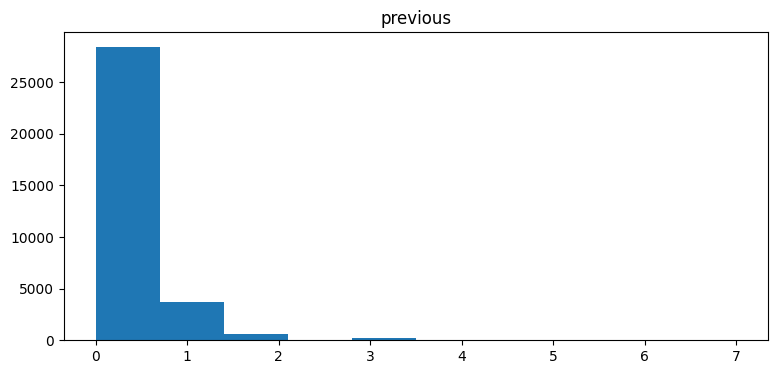

In [ ]:
for column in num_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    plt.hist(x=df[column])
    plt.title(column)

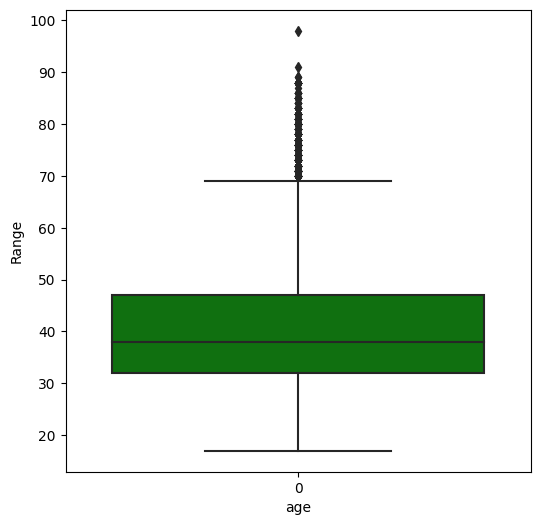

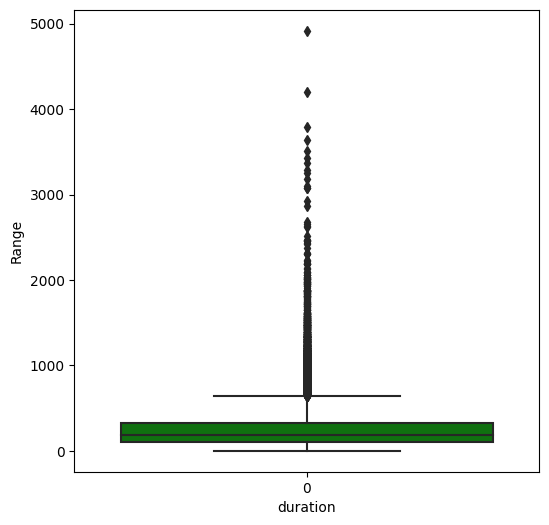

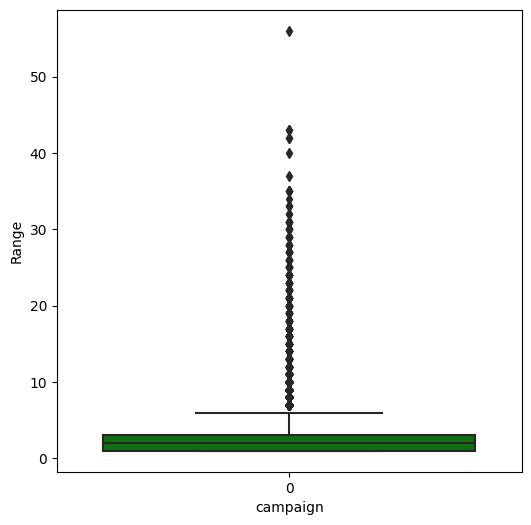

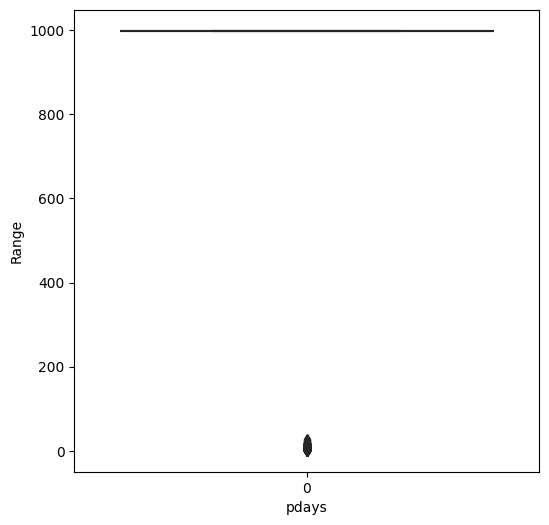

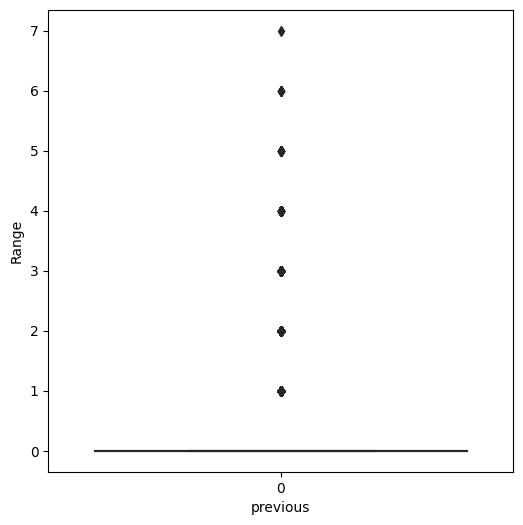

In [ ]:
for i in["age", "duration", "campaign","pdays", "previous"]:
      plt.figure(figsize=(6, 6))
      sns.boxplot(df[i], color='green')
      plt.xlabel(i)
      plt.ylabel('Range')

**Observation :**

*As we can see from the histogram, the
 features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.

*Looking at the plot for pdays, we
 can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.

Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [ ]:
df.drop(columns=["pdays", "previous"], axis=1,inplace=True)

**Bivariate Analysis of Categorical columns**

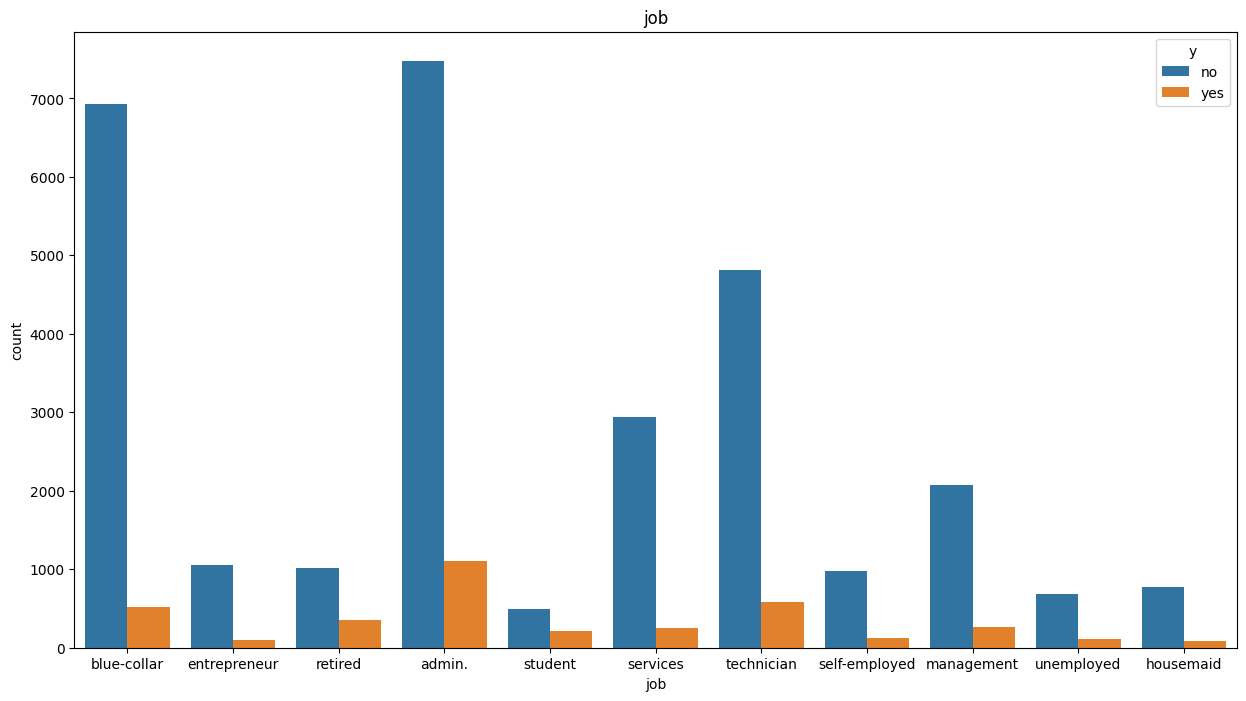

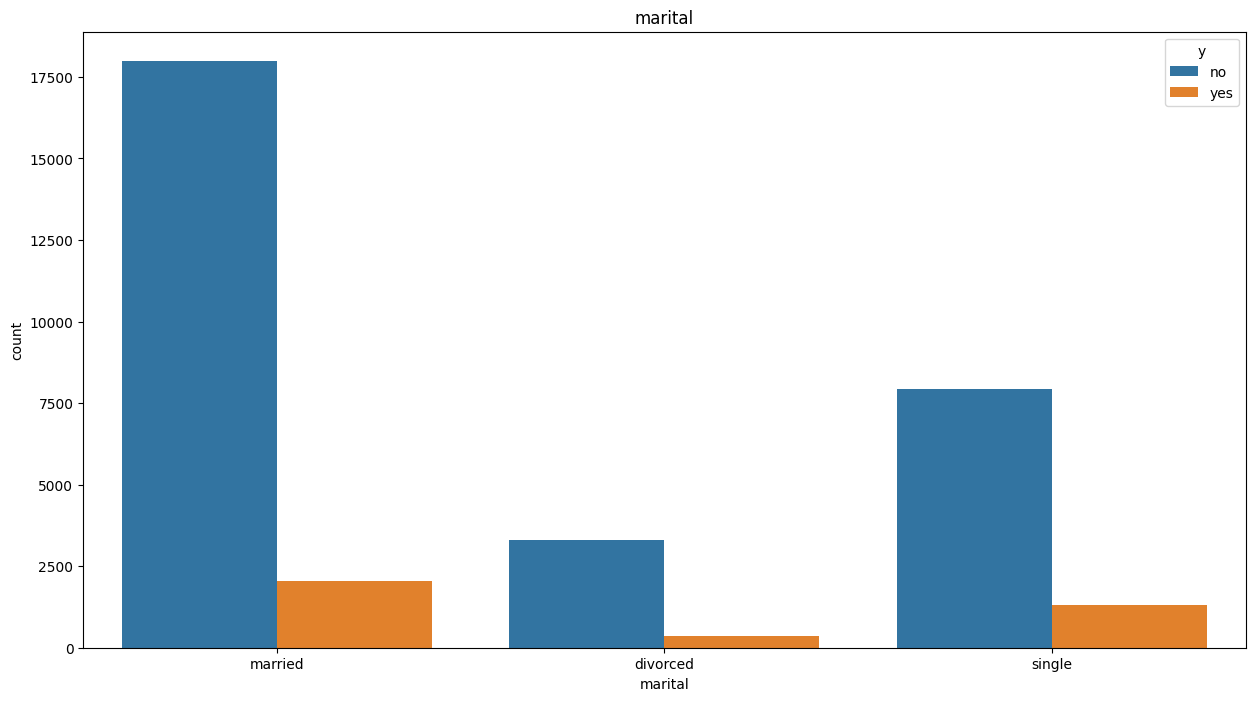

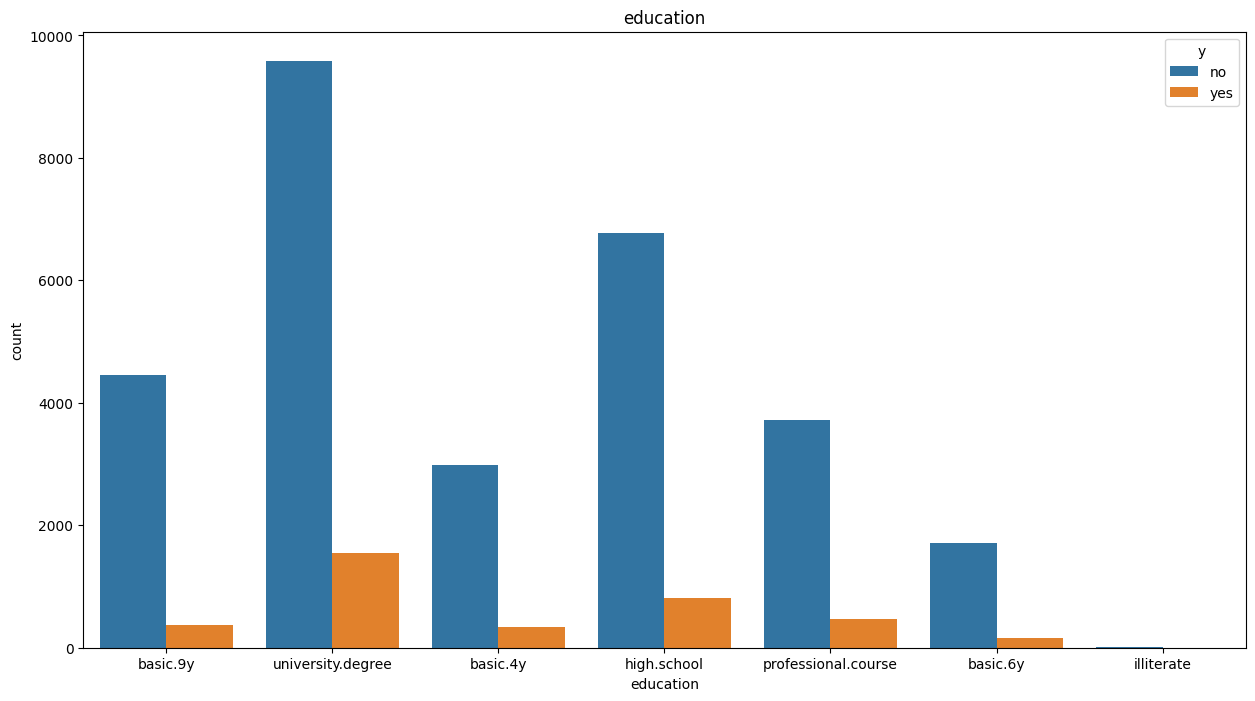

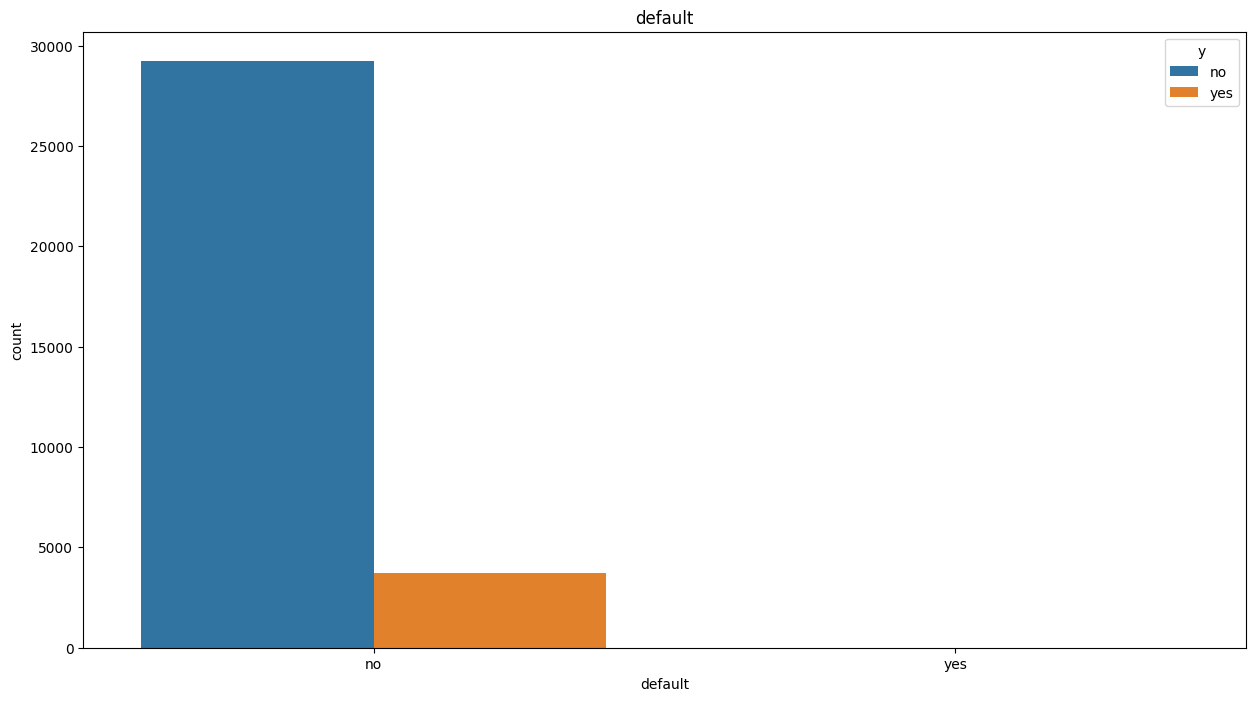

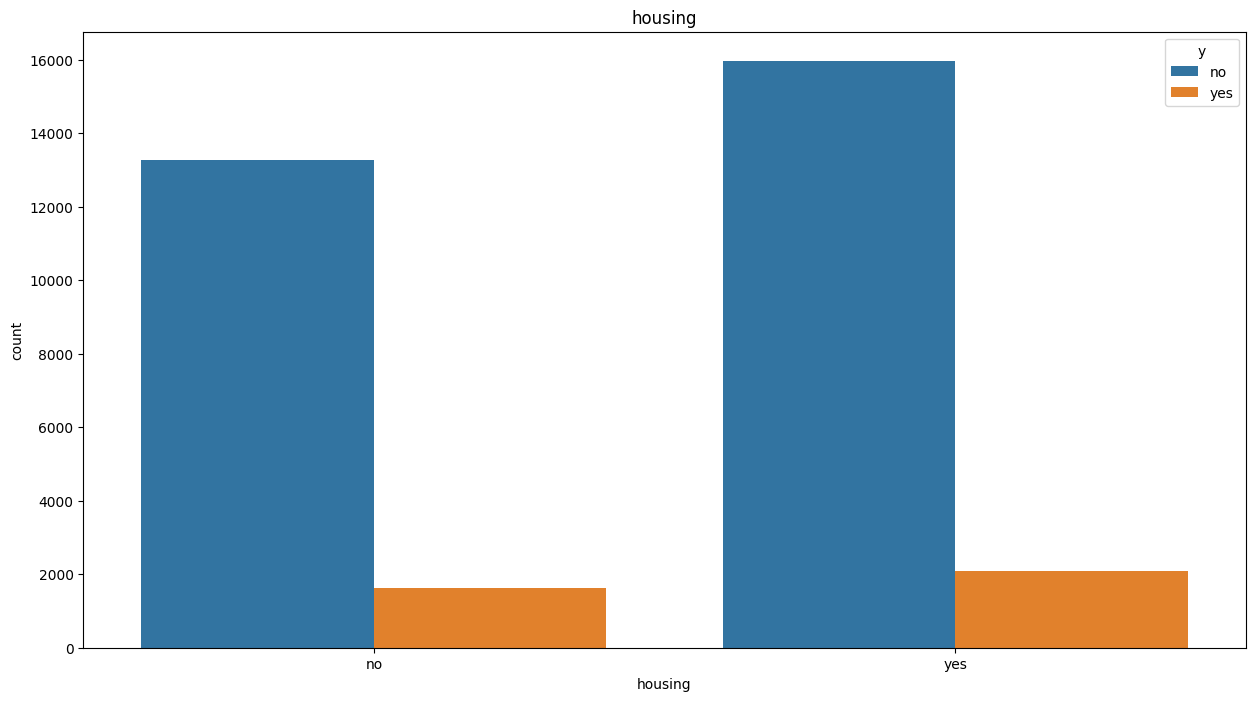

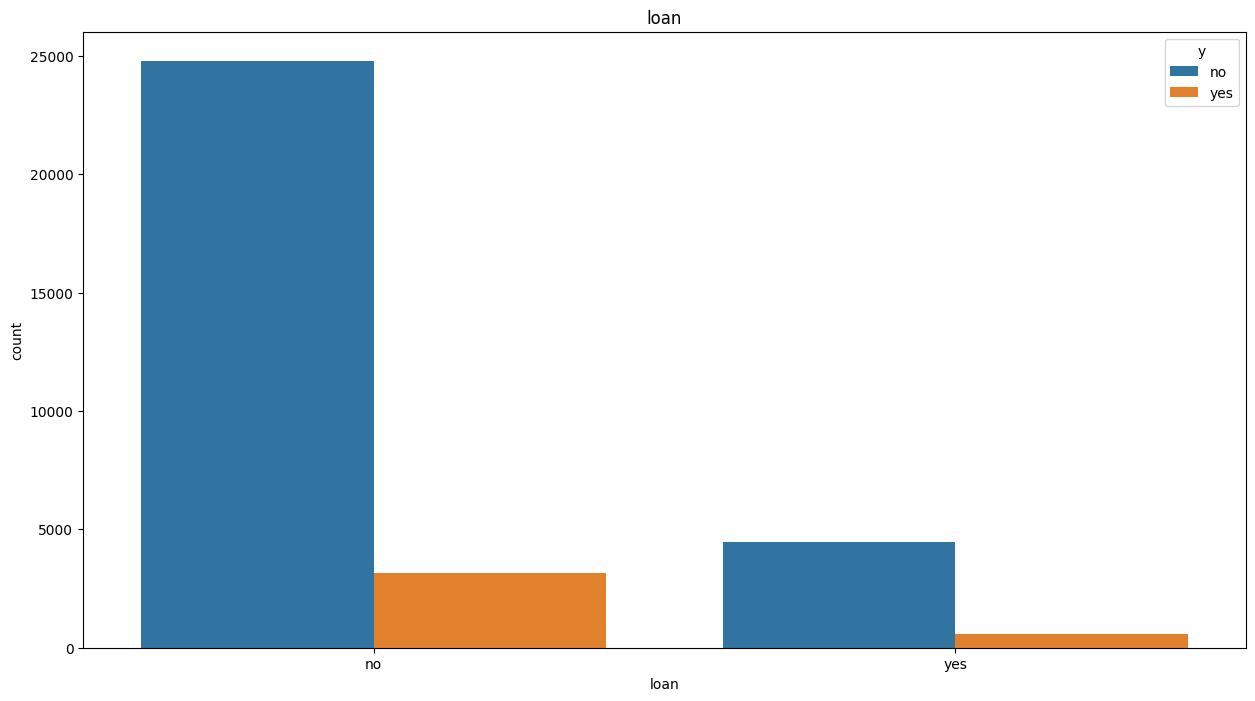

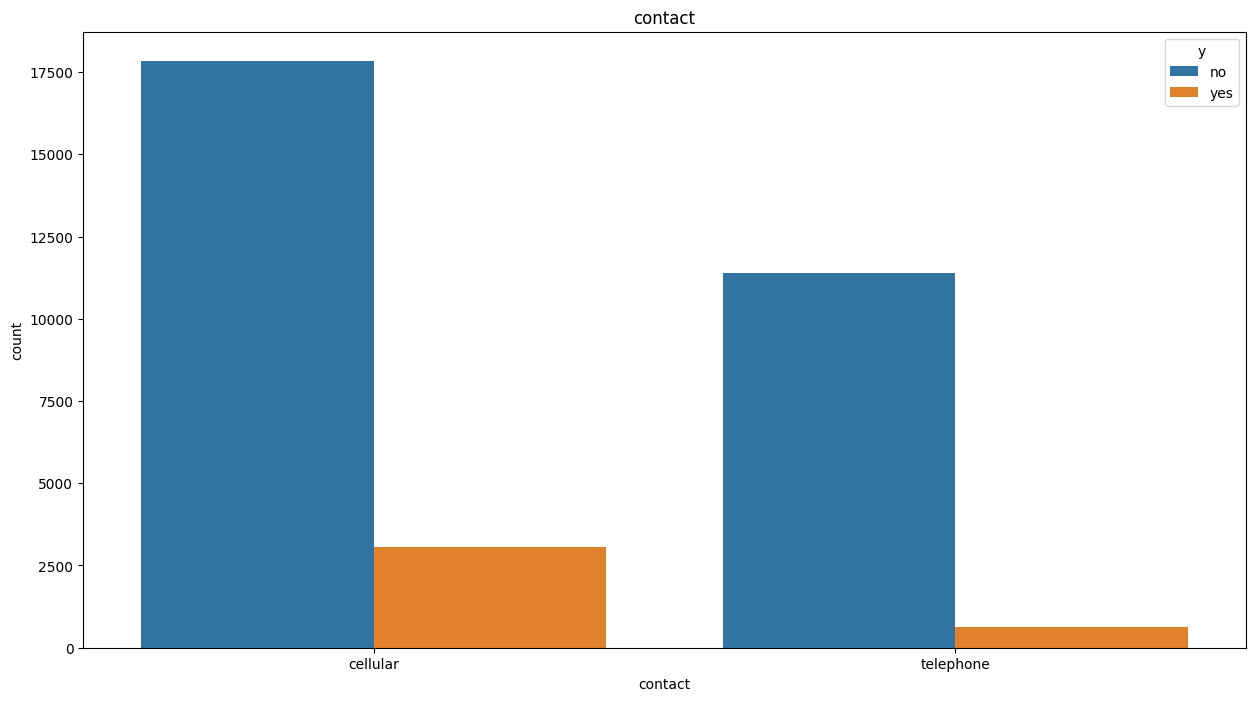

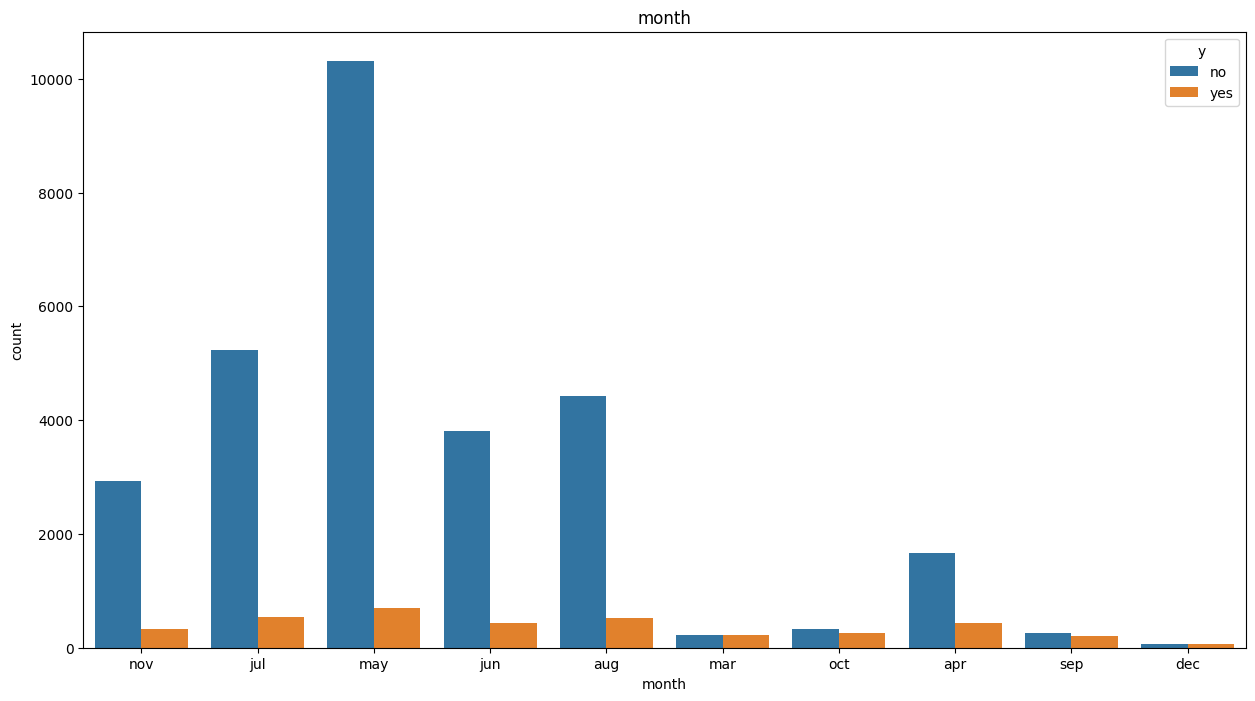

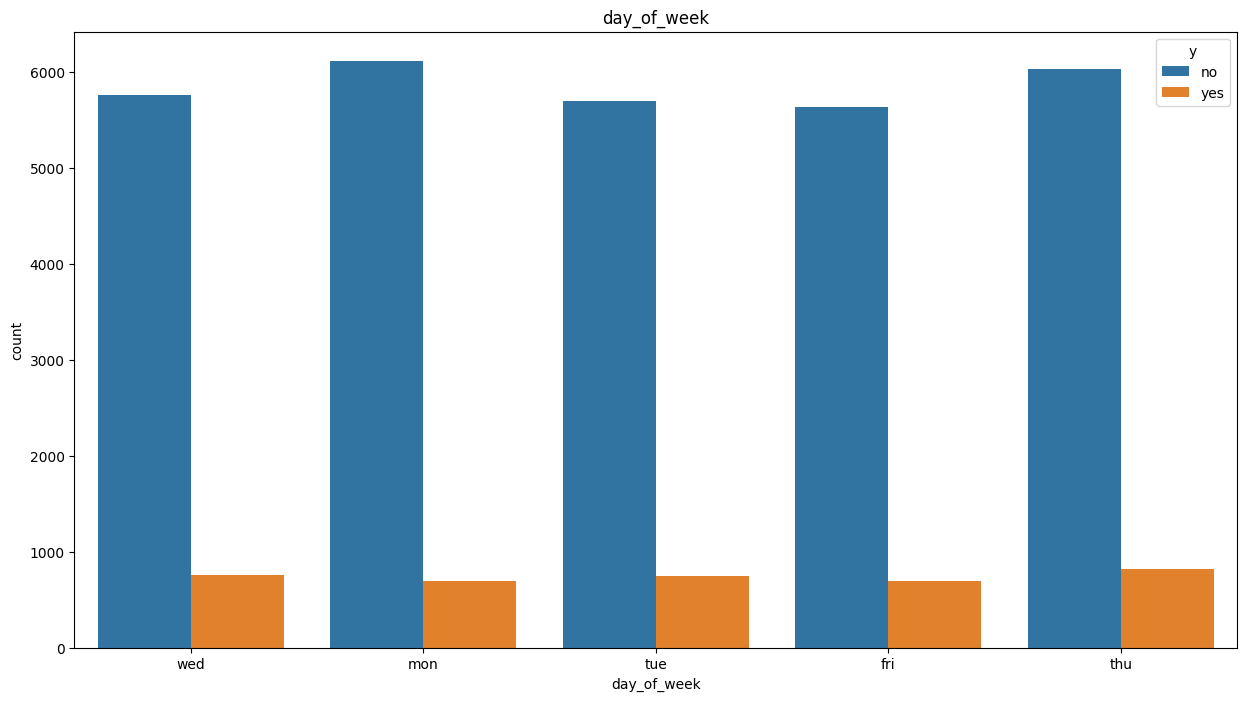

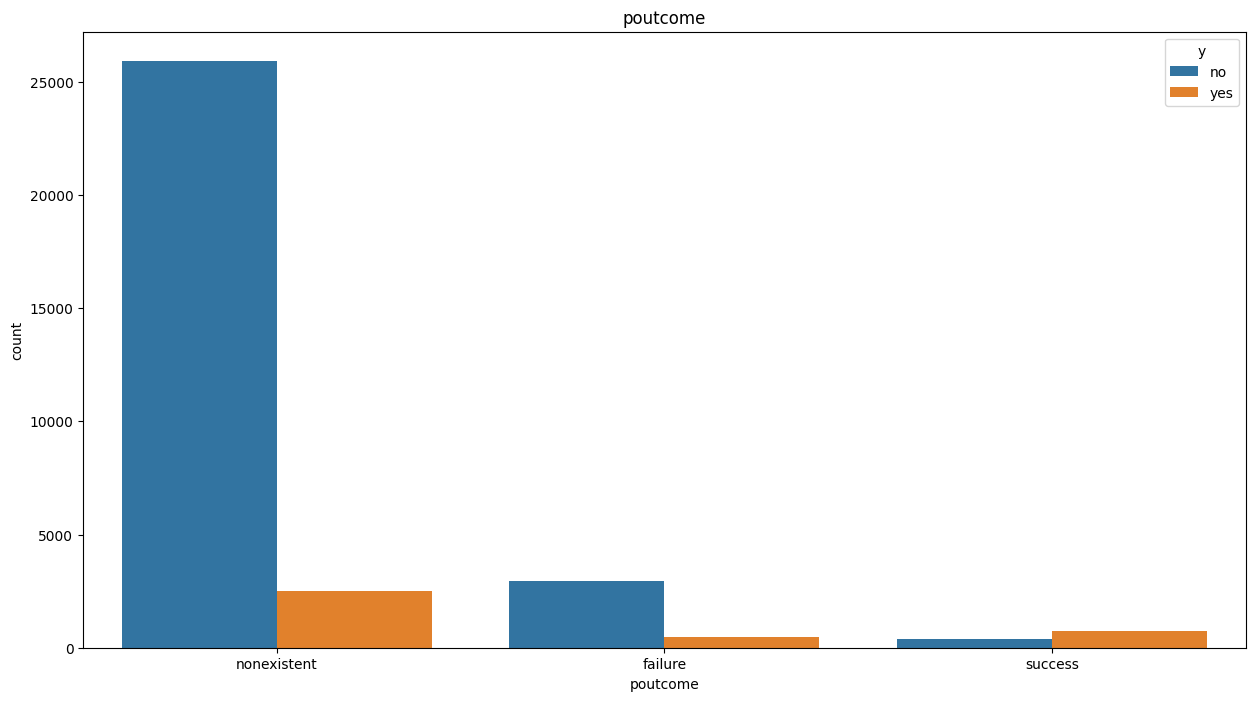

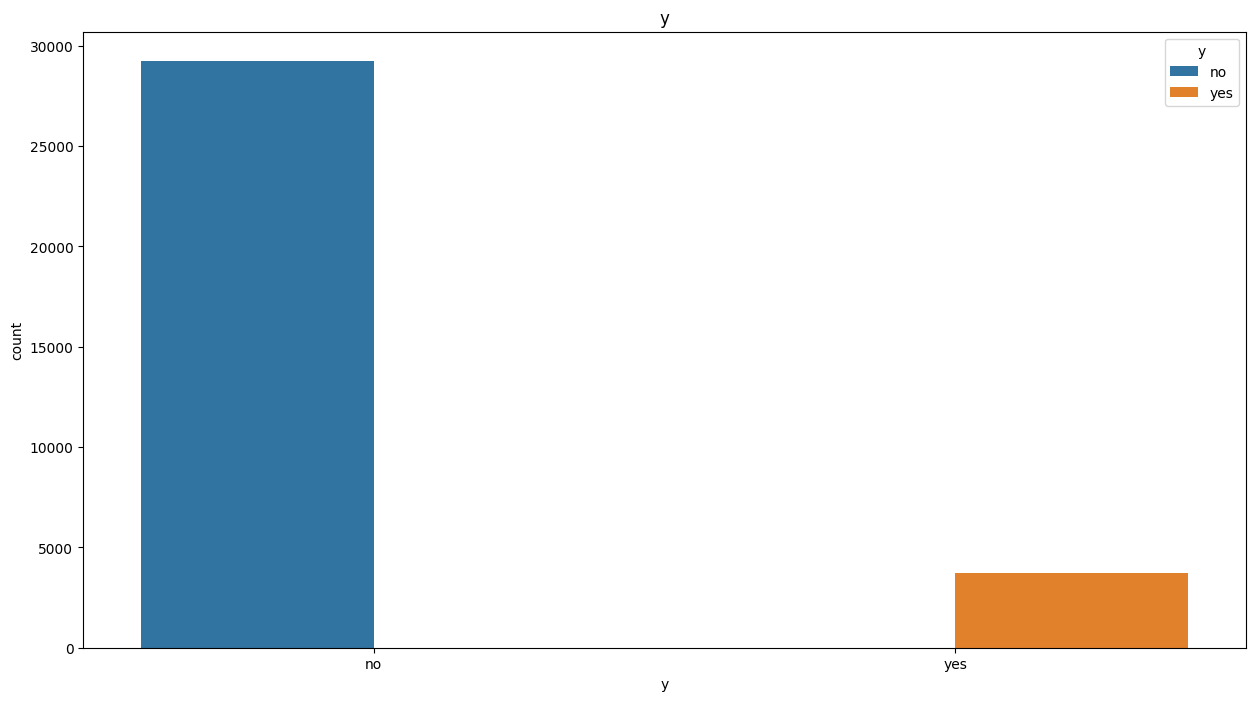

In [ ]:
for column in cat_var:
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[column],hue=df["y"])
    plt.title(column)




**Observations:**

*Customers having administrative jobs
 form the majority amongst those who have subscirbed to the term deposit.

*They are married

*They hold a university degree

*They do not hold a credit in default

*Housing loan doesn't seem a priority
 to check for since an equal number of customers who have and have not subscribed to the term deposit.

*Cell-phones should be the preferred
 mode of contact for contacting customers

**Handling outliers**

Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers

In [ ]:
df.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607
std,10.403636,258.975917,2.752326
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


age,duration and compaign are skewed towards right,we will compute the IQR(Interquartile Range) and replace the outliers with the lower and upper bounderies

In [ ]:
lower=[]
upper=[]
for i in ["age","duration","campaign"]:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-(IQR*1.5)
  upper_bound=q3+(IQR*1.5)
  print(i,':',lower_bound,',',upper_bound)
  lower.append(lower_bound)
  upper.append(upper_bound)

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [ ]:
# replace all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age","duration","campaign"]:
    df.loc[df[i]>upper[j],i]=int(upper[j])
    j+=1


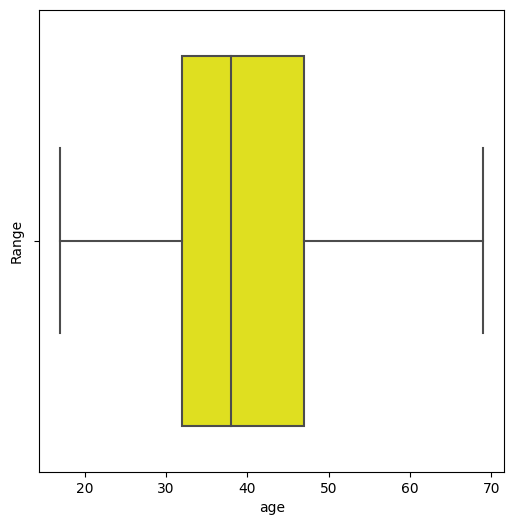

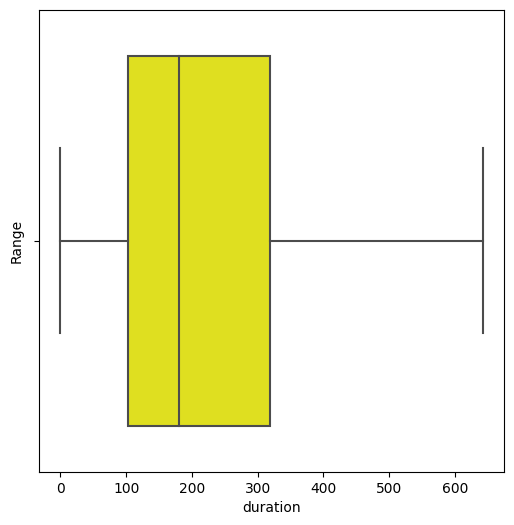

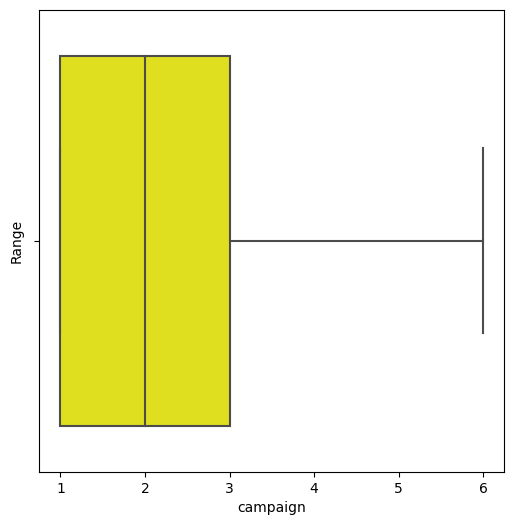

In [ ]:
for i in["age","duration","campaign"]:
      plt.figure(figsize=(6, 6))
      sns.boxplot(x=df[i],color='yellow')
      plt.xlabel(i)
      plt.ylabel('Range')

Since,

*for age the lower boundary (9.5) <
 minimum value (17)

*for duration and campaigh the lower
 boundaries are negative (-221.0), (-2.0) resp.

replacing outliers with the lower boundary is not required

In [ ]:
#without outliers
df.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,39.929894,234.923915,2.271077
std,10.118566,176.854558,1.546302
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,69.000000,643.000000,6.000000


After replacing the outliers with the upper boundary, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

**Encoding categorical Features**

Machine learning algorithm can only read numerical values.Therefore it is essential to encode categorical features into numerical values.we will Label Encode them,as One Hot Encoding would create so many columns

In [ ]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
for i in cat_var:
    print(i, ":", df[i].unique())
    print('---------------------------------')

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
---------------------------------
marital : ['married' 'divorced' 'single']
---------------------------------
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
---------------------------------
default : ['no' 'yes']
---------------------------------
housing : ['no' 'yes']
---------------------------------
loan : ['no' 'yes']
---------------------------------
contact : ['cellular' 'telephone']
---------------------------------
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
---------------------------------
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
---------------------------------
poutcome : ['nonexistent' 'failure' 'success']
---------------------------------
y : ['no' 'yes']
---------------------------------


In this, "education","job," "marital," "default," "housing," "loan," "contact," "month," "day_of_week," and "poutcome" are likely nominal variables in this dataset.

In [ ]:
df['education']=df['education'].map({"illiterate":0,"basic.4y":1,"basic.6y":2,"basic.9y":3,"high.school":4,"professional.course":5,"university.degree":6})
df['default']=df['default'].map({'yes':0,'no':1})
df['housing']=df['housing'].map({'yes':0,'no':1})
df['loan']=df['loan'].map({'yes':0,'no':1})
df['y']=df['y'].map({'yes':1,'no':0})


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
   if df[i].dtype=='object':
      df[i]=le.fit_transform(df[i])
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,3,1,1,1,0,7,4,227,4,1,0
1,37,2,1,6,1,1,1,1,7,4,202,2,0,0
2,69,5,1,1,1,1,1,0,3,1,643,1,1,1
3,36,0,1,6,1,0,1,1,6,1,120,2,1,0
4,59,5,0,6,1,1,1,0,4,3,368,2,1,0
5,29,0,2,6,1,1,1,0,1,4,256,2,1,0
6,26,8,2,3,1,1,1,1,1,4,449,1,1,1
7,30,1,1,1,1,0,1,0,7,4,126,2,1,0
8,50,1,1,1,1,1,1,1,6,0,574,1,1,0
9,33,0,2,4,1,0,1,0,3,3,498,5,1,0


**Checking Correlation of feature variables**

<Axes: >

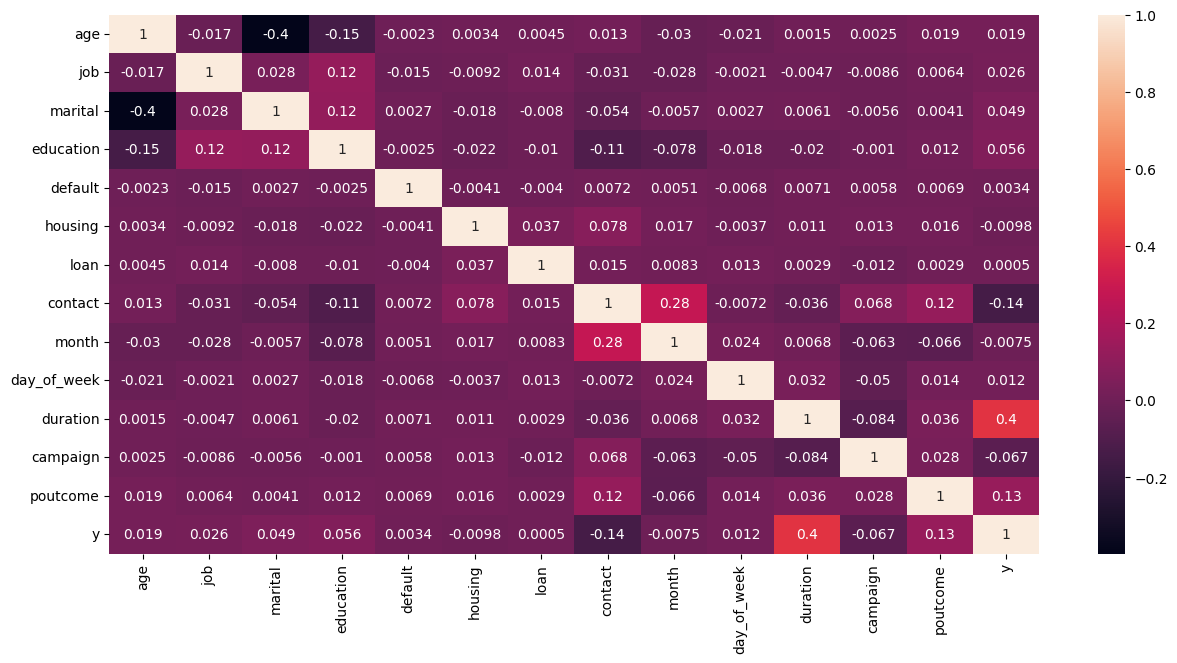

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

**Separating independent and dependent variables**

In [ ]:
# feature variables
x= df.iloc[:, :-1]

# target variable
y= df.iloc[:, -1]

#categorical features
m=df.drop(['age','campaign','duration'],axis=1)

In [ ]:
from sklearn.feature_selection import chi2
score=chi2(m,y)
score

(array([7.52601067e+01, 2.49744667e+01, 6.67203821e+01, 3.46806269e-05,
        1.71677098e+00, 1.25095888e-03, 4.28971649e+02, 2.36072373e+00,
        4.59315286e+00, 7.67733879e+01, 2.92380000e+04]),
 array([4.12612826e-18, 5.80945929e-07, 3.12883250e-16, 9.95301264e-01,
        1.90109222e-01, 9.71785586e-01, 2.72087866e-95, 1.24424453e-01,
        3.20999145e-02, 1.91744033e-18, 0.00000000e+00]))

In [ ]:
#fscore
f_value=pd.Series(score[0],index=m.columns)
f_value.sort_values(ascending=False)

y              29238.000000
contact          428.971649
poutcome          76.773388
job               75.260107
education         66.720382
marital           24.974467
day_of_week        4.593153
month              2.360724
housing            1.716771
loan               0.001251
default            0.000035
dtype: float64

In [ ]:
#p value
p_value=pd.Series(score[1],index=m.columns)
p_value.sort_values(ascending=False)

default        9.953013e-01
loan           9.717856e-01
housing        1.901092e-01
month          1.244245e-01
day_of_week    3.209991e-02
marital        5.809459e-07
education      3.128833e-16
job            4.126128e-18
poutcome       1.917440e-18
contact        2.720879e-95
y              0.000000e+00
dtype: float64

Text(0.5, 1.0, 'p-value graph')

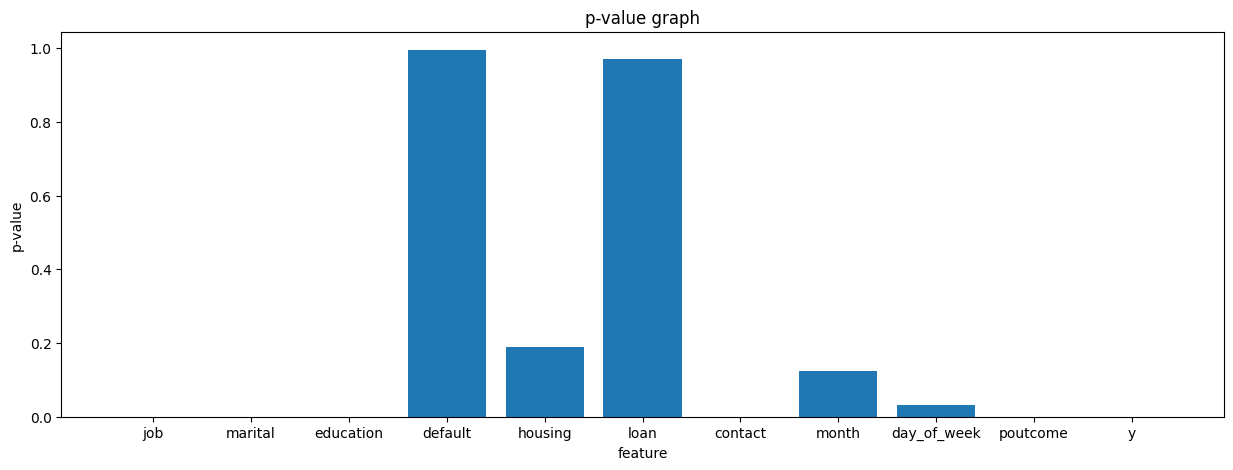

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(p_value.index,p_value)
plt.xlabel('feature')
plt.ylabel('p-value')
plt.title("p-value graph")

a small p-value (typically less than 0.05) indicates a significant association, suggesting that the feature may be important in predicting the target variable. Conversely, a large p-value suggests that there may not be a significant association.

In [ ]:
X=x.drop(['default','housing','loan','month','day_of_week'],axis=1)

**Handling imbalanced dataset**

Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(X,y)
y_resampled.value_counts()

0    29238
1    29238
Name: y, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,random_state=42,test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#model creation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn=KNeighborsClassifier()
svm=SVC()
nb=BernoulliNB()
lr=LogisticRegression()
dec=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
lst=[knn,nb,svm,lr,dec,rf]
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)

  print(i)
  print('Score:',accuracy_score(y_pred,y_test))
  print(classification_report(y_pred,y_test))
  print(confusion_matrix(y_pred,y_test))
  print('------------------------------------------------------')

KNeighborsClassifier()
Score: 0.8554409166049136
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      8062
           1       0.90      0.83      0.86      9481

    accuracy                           0.86     17543
   macro avg       0.86      0.86      0.86     17543
weighted avg       0.86      0.86      0.86     17543

[[7139  923]
 [1613 7868]]
------------------------------------------------------
BernoulliNB()
Score: 0.7372171236390583
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      9876
           1       0.67      0.77      0.72      7667

    accuracy                           0.74     17543
   macro avg       0.74      0.74      0.74     17543
weighted avg       0.75      0.74      0.74     17543

[[7009 2867]
 [1743 5924]]
------------------------------------------------------
SVC()
Score: 0.8376560451462122
              precision    recall  f1-score   support

      

**Gridsearch and hyperparameter tuning**

* **KNeighborsClassifier**




In [ ]:
from sklearn.model_selection import GridSearchCV

knn_param_grid={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
knn_grid_search=GridSearchCV(knn,knn_param_grid,cv=7)
knn_grid_search.fit(x_train,y_train)
knn_best_model=knn_grid_search.best_estimator_

y_pred_knn=knn_best_model.predict(x_test)

print("Best parameters for KNN:",knn_grid_search.best_params_)
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      8752
           1       0.84      0.92      0.88      8791

    accuracy                           0.87     17543
   macro avg       0.87      0.87      0.87     17543
weighted avg       0.87      0.87      0.87     17543

[[7172 1580]
 [ 714 8077]]


* **Naive bayes**

In [ ]:
naive_bayes_param_grid={'alpha':[0.1,1,10],'binarize':[0.5]}
naive_bayes_grid_search=GridSearchCV(nb,naive_bayes_param_grid,cv=7)
naive_bayes_grid_search.fit(x_train,y_train)
naive_bayes_best_model=naive_bayes_grid_search.best_estimator_

y_pred_naive_bayes=naive_bayes_best_model.predict(x_test)

print("Best parameters for Naive Bayes:",naive_bayes_grid_search.best_params_)
print(classification_report(y_test,y_pred_naive_bayes))
print(confusion_matrix(y_test,y_pred_naive_bayes))

Best parameters for Naive Bayes: {'alpha': 0.1, 'binarize': 0.5}
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      8752
           1       0.74      0.73      0.73      8791

    accuracy                           0.73     17543
   macro avg       0.73      0.73      0.73     17543
weighted avg       0.73      0.73      0.73     17543

[[6493 2259]
 [2395 6396]]


* **Support Vector Machine**

In [ ]:
# svm_param_grid ={'C':[0.1,1,10],'kernel':['linear','rbf','poly','sigmoid'],'degree': [2, 3, 4],'gamma': ['scale', 'auto']}
# svm_model=SVC()
# svm_grid_search=GridSearchCV(svm_model,svm_param_grid,cv=5)
# svm_grid_search.fit(x_train,y_train)
# svm_best_model=svm_grid_search.best_estimator_
# y_pred_svm=svm_best_model.predict(x_test)
# print("Best parameters for SVM:",svm_grid_search.best_estimator_)
# print(classification_report(y_test,y_pred_svm))
# print(confusion_matrix(y_test,y_pred_svm))


* **LogisticRegression**

In [ ]:
logistic_regression_param_grid={'C':[0.1,1,10],'penalty':['l1','l2'],'solver':['liblinear','saga']}
logistic_regression_model=LogisticRegression(max_iter=1000)
logistic_regression_grid_search=GridSearchCV(logistic_regression_model,logistic_regression_param_grid,cv=7)
logistic_regression_grid_search.fit(x_train,y_train)
logistic_regression_best_model=logistic_regression_grid_search.best_estimator_

y_pred_logistic_regression=logistic_regression_best_model.predict(x_test)

print("Best parameters for LogisticRegression:",logistic_regression_grid_search.best_estimator_)
print(classification_report(y_test,y_pred_logistic_regression))
print(confusion_matrix(y_test,y_pred_logistic_regression))

Best parameters for LogisticRegression: LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      8752
           1       0.80      0.78      0.79      8791

    accuracy                           0.79     17543
   macro avg       0.79      0.79      0.79     17543
weighted avg       0.79      0.79      0.79     17543

[[7031 1721]
 [1953 6838]]


* **DecisionTreeClassifier**

In [ ]:
decision_tree_param_grid = {'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
decision_tree_model = DecisionTreeClassifier()
decision_tree_grid_search = GridSearchCV(decision_tree_model, decision_tree_param_grid, cv=7)
decision_tree_grid_search.fit(x_train, y_train)
decision_tree_best_model = decision_tree_grid_search.best_estimator_

y_pred_decision_tree = decision_tree_best_model.predict(x_test)

print("Best parameters for DecisionTreeClassifier:",decision_tree_grid_search.best_estimator_)
print(classification_report(y_test,y_pred_decision_tree))
print(confusion_matrix(y_test,y_pred_decision_tree))


Best parameters for DecisionTreeClassifier: DecisionTreeClassifier(criterion='entropy')
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      8752
           1       0.86      0.90      0.88      8791

    accuracy                           0.88     17543
   macro avg       0.88      0.88      0.88     17543
weighted avg       0.88      0.88      0.88     17543

[[7444 1308]
 [ 840 7951]]


* **RandomForestClassifier**




In [ ]:
random_parameters = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55],'criterion':['gini','entropy']}
random_model=RandomForestClassifier()
random_grid_search = GridSearchCV(random_model,random_parameters,cv=7)
random_grid_search.fit(x_train,y_train)
random_best_model=random_grid_search.best_estimator_

y_pred_random =random_best_model.predict(x_test)

print("Best parameters for RandomForestClassifier:",random_grid_search.best_estimator_)
print(classification_report(y_test,y_pred_random))
print(confusion_matrix(y_test,y_pred_random))


Best parameters for RandomForestClassifier: RandomForestClassifier(n_estimators=55)
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      8752
           1       0.88      0.93      0.90      8791

    accuracy                           0.90     17543
   macro avg       0.90      0.90      0.90     17543
weighted avg       0.90      0.90      0.90     17543

[[7598 1154]
 [ 605 8186]]


**RandomForestClassifier seems to have the highest accuracy and balanced precision and recall for the positive class (1). The F1-score, which is the harmonic mean of precision and recall, is also high. This model may be a good choice for predicting whether a customer will subscribe to a term deposit.**

In [ ]:
#Prediction by using a random input

y_predict1=random_best_model.predict(scaler.transform([[36,0,1,6,1,120,2,1]]))
y_predict1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
y_predict2=random_best_model.predict(scaler.transform([[69,5,1,1,0,643,1,1]]))
y_predict2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])